<a href="https://colab.research.google.com/github/liviiiaaaa/Atividade2_Simcomex/blob/main/Atividade_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ATIVIDADE 2.2 |  Expected values, Surprise, Entropy, Cross-entropy loss, Softmax e True labels (one-hot encoded)

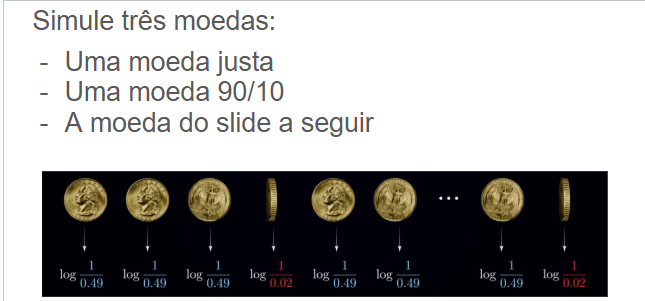

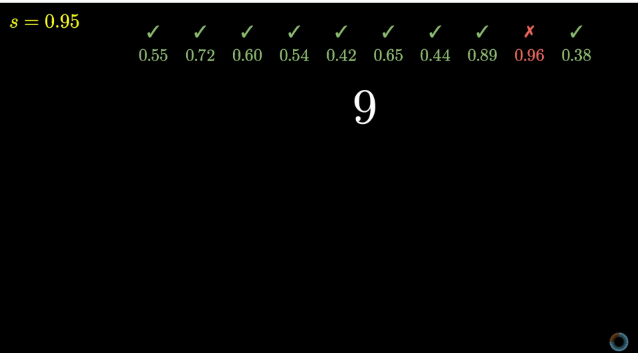

# Parte A – Surpresa e Entropia
Simule três moedas:
- Uma moeda justa;
- Uma moeda 90/10;
- A moeda do slide a seguir;

- Curvas de Surpresa empírica (Y) vs número de experimentos (X).

- Cada linha representa uma moeda:

  - Moeda Justa (50/50)

  - Moeda Viciada (90/10)

  - Moeda Slide (80/20)

- Eixo X: número de experimentos (10, 100, 1000)

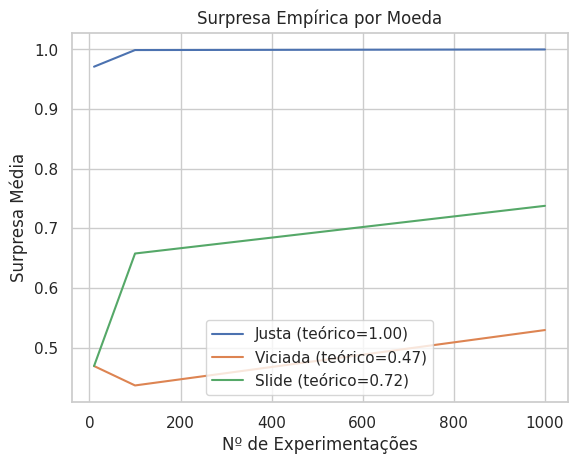

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

moedas = {
    "Justa": [0.5, 0.5], # Moeda Justa (50/50)
    "Viciada": [0.9, 0.1], # Moeda Viciada (90/10)
    "Slide": [0.8, 0.2] # Moeda Slide (80/20)
}

experimentos = [10, 100, 1000]
surpresas = {}

for nome, probs in moedas.items():
    teorica = -sum(p * math.log2(p) for p in probs)
    resultados = []
    for n in experimentos:
        amostras = np.random.choice([0,1], size=n, p=probs)
        contagens = np.bincount(amostras, minlength=2) / n
        empirica = -sum(p * math.log2(p) if p > 0 else 0 for p in contagens)
        resultados.append(empirica)
    surpresas[nome] = (teorica, resultados)

for nome, (teorico, valores) in surpresas.items():
    plt.plot(experimentos, valores, label=f"{nome} (teórico={teorico:.2f})")
plt.xlabel("Nº de Experimentações")
plt.ylabel("Surpresa Média")
plt.title("Surpresa Empírica por Moeda")
plt.legend()
plt.show()


**Explicação:** Simula moedas com diferentes probabilidades e calcula a surpresa teórica e empírica conforme o número de experimentos aumenta.

# Parte B – Cross-Entropy e Softmax

- Eixo X: número da iteração (1 a 30)

- Eixo Y: cross-entropy calculada após aplicar ruído aos logits

- Uma linha com pontos indica a flutuação da entropia ao longo do tempo

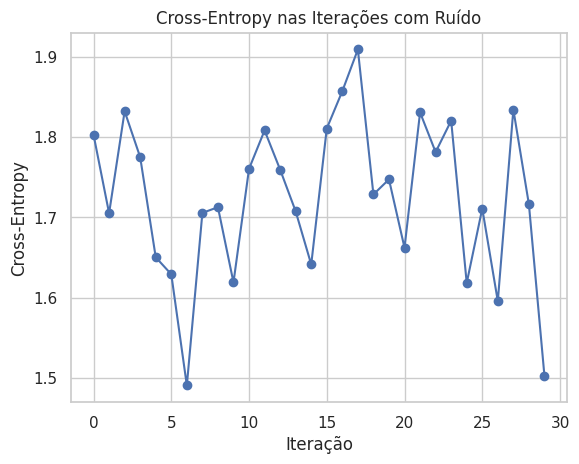

In [17]:

from scipy.special import softmax

np.random.seed(42)

logits = np.random.uniform(0.1, 3.0, size=(3, 3))
true_labels = np.eye(3)

def cross_entropy(preds, labels):
    return -np.sum(labels * np.log(preds + 1e-9)) / preds.shape[0]

entropias = []
for _ in range(30):
    ruido = np.random.normal(0, 0.2, size=logits.shape)
    logits_ruido = logits + ruido
    probs = softmax(logits_ruido, axis=1)
    ce = cross_entropy(probs, true_labels)
    entropias.append(ce)

plt.plot(entropias, marker='o')
plt.title("Cross-Entropy nas Iterações com Ruído")
plt.xlabel("Iteração")
plt.ylabel("Cross-Entropy")
plt.show()


**Explicação:** Calcula a entropia cruzada entre probabilidades geradas por softmax e rótulos verdadeiros (one-hot).

# Parte C – Naive Bayes “Spam vs Ham”
- Esse classificador usa contagem de palavras (modelo de saco de palavras) e multiplicação de probabilidades para prever se uma frase é spam.

- A frase "compre anexo" mistura palavras típicas de cada classe:

- "compre" → associada a spam.

- "anexo" → mais comum em ham (emails formais).

- O resultado depende de frequência relativa ajustada pela Laplace.
Se **"compre"** for muito mais frequente que "anexo" nos dados, o classificador vai pender para "spam".



In [4]:
# ==== Dados e tokenização =============================================
from collections import Counter
import numpy as np

spam = ["oferta exclusiva", "compre agora", "desconto imperdível"]
ham  = ["relatório de reunião", "anexo solicitado", "agenda semanal"]

def tokenize(frases):
    return [palavra for frase in frases for palavra in frase.split()]

spam_tokens = tokenize(spam)
ham_tokens  = tokenize(ham)
vocab = set(spam_tokens + ham_tokens)

# ==== Contagens e prob. com Laplace ===================================
count_spam = Counter(spam_tokens)
count_ham  = Counter(ham_tokens)

def p_palavra(palavra, classe):
    """Probabilidade P(palavra|classe) com suavização de Laplace."""
    if classe == "spam":
        return (count_spam[palavra] + 1) / (len(spam_tokens) + len(vocab))
    else:
        return (count_ham[palavra] + 1)  / (len(ham_tokens)  + len(vocab))

# ==== Classificador ====================================================
def classifica(frase):
    palavras = frase.split()
    p_spam = p_ham = 1
    for w in palavras:
        p_spam *= p_palavra(w, "spam")
        p_ham  *= p_palavra(w, "ham")
    return "Spam" if p_spam > p_ham else "Ham"

# ==== Teste rápido =====================================================
frase_teste = "compre anexo"
print(f'"{frase_teste}"  ➜  {classifica(frase_teste)}')


"compre anexo"  ➜  Spam


# Parte D – Gauss Naive Bayes (3 features contínuas)

- 3 PDFs normais (um para cada feature):

  - Azul: Classe A

  - Vermelho: Classe B

Explicação:
- Para todas as 3 variáveis (x1, x2, x3), a distribuição da Classe B está deslocada à direita (valores maiores), confirmando:

  - Média da Classe B > Classe A

- Os gráficos mostram que:

  - As PDFs não se sobrepõem totalmente, então há boa separabilidade entre as classes.

  - Isso é excelente para o Naive Bayes, que se baseia na probabilidade de cada valor
𝑥
𝑖
x
i
​
  dado uma classe.

- Visualmente, fica claro que amostras com valores próximos de [10, 11, 9] são muito improváveis na Classe A, e muito prováveis na Classe B.

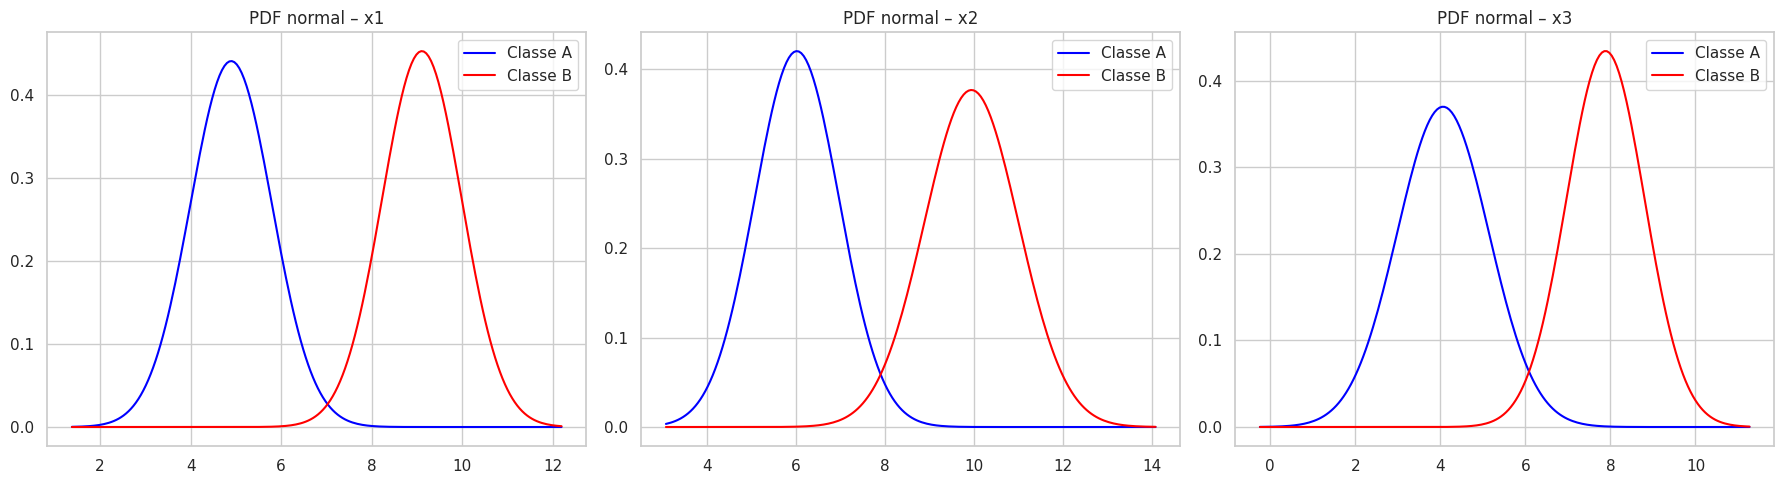

Amostra [6, 6, 5]  → Classe A
Amostra [10, 11, 9] → Classe B


In [5]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
sns.set(style="whitegrid")

# ==== Simulação de 3 variáveis para 2 classes ==========================
x1_A = np.random.normal(5,  1, 100)
x2_A = np.random.normal(6,  1, 100)
x3_A = np.random.normal(4,  1, 100)

x1_B = np.random.normal(9,  1, 100)
x2_B = np.random.normal(10, 1, 100)
x3_B = np.random.normal(8,  1, 100)

# ==== Visualização das PDFs ============================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, (a, b, nome) in enumerate(zip(
        [x1_A, x2_A, x3_A], [x1_B, x2_B, x3_B], ["x1", "x2", "x3"])):
    xs = np.linspace(min(a.min(), b.min())-1, max(a.max(), b.max())+1, 200)
    axes[idx].plot(xs, norm.pdf(xs, a.mean(), a.std()), label="Classe A", color="blue")
    axes[idx].plot(xs, norm.pdf(xs, b.mean(), b.std()), label="Classe B", color="red")
    axes[idx].set_title(f"PDF normal – {nome}")
    axes[idx].legend()
plt.tight_layout(); plt.show()

# ==== Estatísticas (μ, σ) por classe e feature =========================
stats = {
    "A": [(x1_A.mean(), x1_A.std()), (x2_A.mean(), x2_A.std()), (x3_A.mean(), x3_A.std())],
    "B": [(x1_B.mean(), x1_B.std()), (x2_B.mean(), x2_B.std()), (x3_B.mean(), x3_B.std())]
}

# ==== Classificador Gauss NB manual ====================================
def gauss_nb(sample, stats):
    pA = pB = 1
    for i, x in enumerate(sample):
        pA *= norm.pdf(x, *stats["A"][i])
        pB *= norm.pdf(x, *stats["B"][i])
    return "Classe A" if pA > pB else "Classe B"

# ==== Teste com duas amostras =========================================
print("Amostra [6, 6, 5]  →", gauss_nb([6, 6, 5], stats))
print("Amostra [10, 11, 9] →", gauss_nb([10, 11, 9], stats))


Explicação: cada variável é modelada por uma Normal
𝑁
(
𝜇
,
𝜎
2
)
N(μ,σ
2
 ). O Naive Bayes Gaussiano supõe independência entre features, multiplicando PDFs de cada classe e escolhendo a maior probabilidade conjunta.

# Parte E – GaussianNB no dataset Iris


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



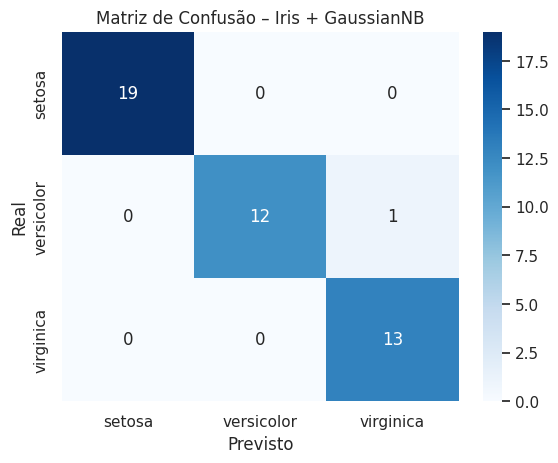

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ==== Dados ============================================================
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42)

# ==== Treino e predição ===============================================
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ==== Métricas =========================================================
print(classification_report(y_test, y_pred, target_names=iris.target_names))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names,
            cmap="Blues")
plt.title("Matriz de Confusão – Iris + GaussianNB")
plt.xlabel("Previsto"); plt.ylabel("Real"); plt.show()


- Explicação:

 - divide-se o Iris em treino/teste (70/30),
  - treina-se GaussianNB,
  - imprime-se relatório de precisão/recall/F1
  - plota-se a matriz de confusão.

- A matriz indica, para cada classe real, quantas vezes o modelo acertou ou errou.

- Se o modelo acertar tudo, a matriz é diagonal (valores diferentes de zero só nas diagonais).

- Se houver erros:

  - Eles surgem como valores fora da diagonal.

  - Permite identificar quais classes estão sendo confundidas (ex.: Versicolor vs Virginica).

- No Iris, é comum ver o GaussianNB com acurácia acima de 90%, mas ele pode confundir Versicolor e Virginica, porque suas distribuições são mais próximas.

# Parte F – Valor Esperado: teoria × simulação

- À medida que o tamanho da amostra cresce, a linha azul converge para a vermelha.

  - Isso valida empiricamente a Lei dos Grandes Números.

- Para 10 amostras, a média empírica pode estar bem longe do esperado.

- A partir de 1000 ou 10000, a média fica quase colada no valor esperado.


Valor Esperado teórico: 23.0


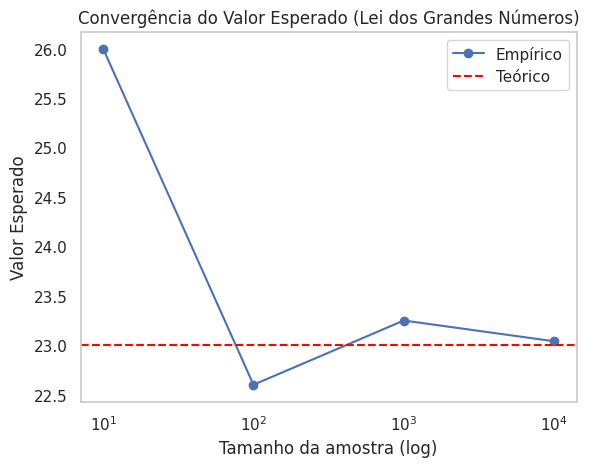

In [7]:
import random, matplotlib.pyplot as plt

# ==== Probabilidades e outcomes =======================================
p = [0.2, 0.3, 0.5]   # probabilidades (somam 1)
x = [10, 20, 30]      # valores associados

E_teorico = sum(p_i * x_i for p_i, x_i in zip(p, x))
print("Valor Esperado teórico:", E_teorico)

# ==== Simulação para tamanhos diferentes ===============================
amostras_log = [10, 100, 1000, 10000]
E_empiricos = []

for n in amostras_log:
    amostra = random.choices(x, weights=p, k=n)
    E_empirico = sum(amostra) / n
    E_empiricos.append(E_empirico)

# ==== Gráfico log-x ====================================================
plt.plot(amostras_log, E_empiricos, marker="o", label="Empírico")
plt.axhline(E_teorico, color="red", linestyle="--", label="Teórico")
plt.xscale("log")
plt.xlabel("Tamanho da amostra (log)")
plt.ylabel("Valor Esperado")
plt.title("Convergência do Valor Esperado (Lei dos Grandes Números)")
plt.legend(); plt.grid(); plt.show()


Explicação:
- Linha da média empírica conforme o tamanho da amostra cresce.

- Linha vermelha tracejada mostra o valor esperado teórico.

- Escala do eixo X em log (logarítmica).

calcula
𝐸
(
𝑋
)
E(X) teoricamente e mostra como a média empírica converge ao valor esperado conforme o número de repetições cresce, ilustrando a Lei dos Grandes Números.